# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

Group Number: 1

Group Members:
- Jihan Aurelia (18222001)
- Nasywaa Anggun Athiefah (18222021)
- Ricky Wijaya (18222043)
- Timotius Vivaldi Gunawan (18222091)

## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from urllib.parse import urlparse
import re
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import pickle
import concurrent.futures
from os import cpu_count
from tqdm import tqdm
import time
import optuna
from sklearn.model_selection import cross_val_score

## Import Dataset

In [7]:
df = pd.read_csv('train.csv')
df

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,235790,49490.txt,NaN,NaN,www.slavevoyages.org,NaN,0.0,NaN,1.000000,0.079963,...,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1
140400,235791,NaN,https://www.greenmountainenergy.com,34.0,www.greenmountainenergy.com,NaN,0.0,com,1.000000,0.522907,...,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1
140401,235792,NaN,https://www.leadcastingcall.com,30.0,www.leadcastingcall.com,23.0,NaN,NaN,1.000000,0.522907,...,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1
140402,235794,NaN,https://www.fedarb.com,21.0,NaN,14.0,NaN,NaN,1.000000,0.522907,...,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1


In [8]:
test = pd.read_csv('test.csv')
test

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,235694,op274.txt,https://756-107694hr4g.weeblysite.com/,38.0,756-107694hr4g.weeblysite.com,29.0,0.0,com,NaN,0.522907,...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
9996,235718,684050.txt,NaN,39.0,www.interactive-sonification.org,32.0,0.0,org,0.541667,0.079963,...,0.0,NaN,NaN,0.0,1.0,NaN,5.0,23.0,0.0,9.0
9997,235733,NaN,https://fuchsiabrownsysadmin--ficohsa121.repl....,NaN,NaN,NaN,0.0,NaN,0.675676,0.005977,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9998,235740,565202.txt,https://www.benoit-mccarthy.com,NaN,www.benoit-mccarthy.com,23.0,0.0,NaN,0.600000,0.522907,...,0.0,0.0,0.0,1.0,11.0,22.0,NaN,45.0,NaN,NaN


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [9]:
train_set_ori = df.copy()
train_set, val_set = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

### **Analisis Null Values**
Handling missing value dilakukan berdasarkan hasil EDA pada tucil sebelumnya.

In [10]:
def null_stats(data):
    null_counts = data.isnull().sum()
    null_percentage = (null_counts / len(data) * 100).round(2)

    null_df = pd.DataFrame({
        'Total Null Values': null_counts,
        'Percentage of Nulls (%)': null_percentage
    })

    null_df = null_df[null_df['Total Null Values'] > 0].sort_values(by='Total Null Values', ascending=False)

    return null_df

In [11]:
null_stats(df)

,Total Null Values,Percentage of Nulls (%)
Domain,70197,50.00
NoOfExternalRef,69379,49.41
LineOfCode,69153,49.25
HasSocialNet,67999,48.43
LargestLineLength,67928,48.38
NoOfURLRedirect,67384,47.99
HasCopyrightInfo,67345,47.97
NoOfCSS,67134,47.81
NoOfObfuscatedChar,66798,47.58
NoOfSelfRedirect,66715,47.52


Seluruh proses cleaning kami lakukan dengan pipeline untuk memudahkan transformasi untuk data test

Berdasarkan jurnal yang disediakan dari dataset original (PHILUsil), Panjang dari URL, Domain, dan TLD memiliki faktor yang berpengaruh besar untuk memprediksi apakah URL termasuk phising atau tidak, maka kami bersihkan dengan membuat custom class HandleLength

In [12]:
class HandleLength(BaseEstimator, TransformerMixin):
    def __init__(self, training=True):
        self.training = training

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.training:
            X = X.dropna(subset=['URL'])
        else:
            X['URL'] = X['URL'].fillna("")

        def extract_domain(url):
            try:
                parsed_url = urlparse(url)
                return parsed_url.netloc if parsed_url.netloc else None
            except:
                return None

        X['Domain'] = X.apply(lambda row: extract_domain(row['URL']) if pd.isna(row['Domain']) else row['Domain'], axis=1)
        X['URLLength'] = X['URL'].apply(lambda x: len(str(x)) if pd.notna(x) else None)

        X['DomainLength'] = X['Domain'].apply(lambda x: len(str(x)) if pd.notna(x) else None)

        return X

Berdasarkan EDA pada tucil sebelumnya, terlihat bahwa TLD tidak memiliki signifikansi dan memiliki distribusi data yang jauh dari normal, maka dari itu kami abaikan dan akan dilakukan drop nantinya.

Selanjutnya, berdasarkan EDA sebelumnya IsHTTPS menjadi faktor terpenting karena memiliki korelasi positif yang tinggi terhadap target label, maka untuk data HTTPS yang kosong atau tidak valid kami bersihkan dengan custom class HandleIsHTTPS

In [13]:
class HandleIsHTTPS(BaseEstimator, TransformerMixin):
    def __init__(self, training=True):
        self.training = training

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """
        Untuk memudahkan proses predicting di akhir, jika data dilakukan train maka URL akan didrop
        tetapi untuk data test, URL akan diberi empty string

        """
        if self.training:
            X = X.dropna(subset=['URL'])
        else:
            X['URL'] = X['URL'].fillna("")

        X['IsHTTPS'] = X['URL'].apply(
            lambda x: 1 if pd.notna(x) and urlparse(x).scheme.lower() == 'https' else 0
        )

        return X


Berdasarkan jurnal, CharContinuationRate memiliki faktor yang signifikan sebagai pertimbangan bahwa URL yang panjang belum tentu phising.

In [14]:
class HandleCharContinuationRate(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        #fungsi menghitung char continuation rate berdasarkan jurnal
        def calculate_char_cont_rate(url):
            if not isinstance(url, str):
                return None
            # Mencari sequence dengan fungsi regex dari base url
            sequences = re.findall(r'[a-zA-Z]+|\d+|[^a-zA-Z\d]+', url)
            total_sequence_length = sum(len(seq) for seq in sequences)
            return total_sequence_length / len(url) if len(url) > 0 else 0

        #impute continuationrate dengan perhitungan
        X['CharContinuationRate'] = X['CharContinuationRate'].fillna(X['URL'].apply(lambda x: calculate_char_cont_rate(x)))

        return X

Setelah mengeksplorasi dataset terdapat beberapa data HasTitle yang tidak valid dan kosong, maka dilakukan handle dengan HandleHasTitle

In [15]:
class HandleHasTitle(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['HasTitle'] = X['Title'].apply(lambda x: 0 if pd.isna(x) else 1)
        return X

Berdasarkan jurnal, URLTitleMatchScore memiliki faktor yang signifikan sebagai pertimbangan bahwa URL dengan Title harus memiliki relevansi

In [16]:
class HandleURLTitleMatchScore(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        def url_title_match_score(title, url):
            if not isinstance(title, str) or not isinstance(url, str):
                return None
            t_set = title.split()
            clean_url = re.sub(r'https?://|www\.', '', url).split('/')[0]
            base_score = 100 / len(clean_url) if len(clean_url) > 0 else 0
            score = 0
            for word in t_set:
                if word in clean_url:
                    score += base_score * len(word)
                    clean_url = clean_url.replace(word, "")
                if score > 99.9:
                    score = 100
                    break

            return score

        X['URLTitleMatchScore'] = X['URLTitleMatchScore'].fillna(X.apply(lambda row: url_title_match_score(row['Title'], row['URL']), axis=1))

        return X


Untuk kolom lainnya yang tidak menggunakan domain specific strategies diimpute dengan FeatureImputer

In [17]:
class FeatureImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.categorical_cols = ['TLD', 'Domain', 'FILENAME', 'URL', 'Title']
        self.boolean_cols = [
            'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon',
            'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
            'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
            'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo'
        ]
        self.numerical_cols = list(set(X.columns) - set(self.categorical_cols) - set(self.boolean_cols))

        # Impute boolean columns with mode
        self.bool_mode_imputer = {}
        for col in self.boolean_cols:
            self.bool_mode_imputer[col] = X[col].mode()[0]

        # Impute numerical continuous columns using IterativeImputer
        self.continuous_imputer = IterativeImputer(estimator=DecisionTreeRegressor(random_state=42))
        self.continuous_imputer.fit(X[self.numerical_cols])

        return self

    def transform(self, X):
        # Impute boolean columns
        for col in self.boolean_cols:
            X[col].fillna(self.bool_mode_imputer[col], inplace=True)

        # Impute numerical columns using the continuous imputer
        X[self.numerical_cols] = self.continuous_imputer.transform(X[self.numerical_cols])

        return X


In [18]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):  # Tambahkan `y=None`
        # Metode fit tidak melakukan apa-apa karena ini hanya transformasi
        return self

    def transform(self, X):
        # Pastikan X adalah DataFrame untuk mendukung .drop()
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input to transform must be a pandas DataFrame.")

        # Menghapus kolom yang ditentukan di self.columns_to_drop
        return X.drop(columns=self.columns_to_drop, errors='ignore')


In [19]:
DROP_OBJECTS = [
    'id','Domain', 'TLD', 'FILENAME', 'URL', 'Title',
]

In [20]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ("length", HandleLength(True)),
                      ("https", HandleIsHTTPS(True)),
                      ("title", HandleHasTitle()),
                      ("char", HandleCharContinuationRate()),
                      ("urltitle", HandleURLTitleMatchScore()),
                      ("imputer", FeatureImputer()),
                      ("dropper", FeatureDropper(DROP_OBJECTS)),
                     ])

In [21]:
train_set = pipeline.fit_transform(train_set)
val_set = pipeline.transform(val_set)

/var/folders/1d/rdx68y05429_hh254m9f84h40000gn/T/ipykernel_99944/2190866745.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Domain'] = X.apply(lambda row: extract_domain(row['URL']) if pd.isna(row['Domain']) else row['Domain'], axis=1)
/var/folders/1d/rdx68y05429_hh254m9f84h40000gn/T/ipykernel_99944/2190866745.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['URLLength'] = X['URL'].apply(lambda x: len(str(x)) if pd.notna(x) else None)
/var/folders/1d/rdx68y05429_hh254m9f84h40000gn/T/ipykernel_

Berikut adalah hasil null values setelah dilakukan data cleaning.

In [22]:
null_stats(train_set)

,Total Null Values,Percentage of Nulls (%)


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

### **Analisis Outliers**
Handling outliers dilakukan berdasarkan hasil EDA pada tucil sebelumnya.

In [23]:
def find_outliers(data):
    outlier_stats_list = []
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
      if data[col].nunique() > 2:
        col_values = data[col].dropna().values
        q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
        iqr = q75 - q25

        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        outliers = data.loc[(data[col] > upper) | (data[col] < lower), col].count()

        outlier_stats_list.append({
            'Column': col,
            'Quartile (25)': q25,
            'Quartile (75)': q75,
            'IQR': iqr,
            'Cut-off': cut_off,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Total Outliers': outliers
        })

    outlier_stats_df = pd.DataFrame(outlier_stats_list)

    return outlier_stats_df

In [24]:
find_outliers(train_set)

,Column,Quartile (25),Quartile (75),IQR,Cut-off,Lower Bound,Upper Bound,Total Outliers
0,URLLength,24.000000,31.000000,7.000000,10.500000,13.500000,41.500000,2408
1,DomainLength,16.000000,23.000000,7.000000,10.500000,5.500000,33.500000,1459
2,CharContinuationRate,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,12832
3,TLDLegitimateProb,0.012927,0.522907,0.509980,0.764970,-0.752044,1.287878,0
4,URLCharProb,0.055451,0.064422,0.008971,0.013456,0.041994,0.077878,3141
5,TLDLength,2.000000,3.000000,1.000000,1.500000,0.500000,4.500000,367
6,NoOfSubDomain,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,12707
7,NoOfObfuscatedChar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30
8,ObfuscationRatio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30
9,NoOfLettersInURL,10.000000,16.000000,6.000000,9.000000,1.000000,25.000000,2748


Kami menggunakan metode iterative untuk membersihkan outliers karena metode ini mempertimbangkan hubungan antar fitur untuk mengisi nilai yang hilang. Dibandingkan metode sederhana seperti pengisian dengan median, metode iterative menghasilkan estimasi yang lebih akurat karena memanfaatkan pola dalam data secara keseluruhan. Selain itu, jumlah outliers yang ditemukan juga terbilang sedikit sehingga hanya perlu metode imputasi.

In [25]:
def handle_outliers(data, method="iterative", estimator=None):
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
        if data[col].nunique() > 2:
            q25, q75 = np.percentile(data[col].dropna(), 25), np.percentile(data[col].dropna(), 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lower, upper = q25 - cut_off, q75 + cut_off


            data.loc[(data[col] < lower) | (data[col] > upper), col] = np.nan


            if method == "iterative":
                imputer = IterativeImputer(estimator=estimator, random_state=42)
                data[[col]] = imputer.fit_transform(data[[col]])
            elif method == "median":
                data[col].fillna(data[col].median(), inplace=True)
            else:
                data[col].dropna(inplace=True)

    return data

In [26]:
train_set = handle_outliers(train_set.copy(), method="iterative", estimator=DecisionTreeRegressor(random_state=42))
val_set = handle_outliers(val_set.copy(), method="iterative", estimator=DecisionTreeRegressor(random_state=42))

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [27]:
print("Rows before dropping duplicates:", len(train_set))
train_set.drop_duplicates(inplace=True)
print("Rows after dropping duplicates:", len(train_set))

train_set.reset_index(drop=True, inplace=True)

Rows before dropping duplicates: 77628
Rows after dropping duplicates: 77626


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

### **Analisis Fitur**
Menentukan fitur yang akan di-drop dilakukan berdasarkan hasil korelasi dengan target label :
1. Kategorisasi untuk beberapa fitur continous sehingga model dapat dengan mudah melakukan pertimbangan tanpa adanya jarak
2. Domain specific knowledge ditambahkan fitur untuk mempertimbangkan apakah URL merupakan TLD dari sebuah negara resmi karena setelah melakukan skimming pada prediksi pertama, terdapat beberapa URL milik negara yang diprediksi phising padahal bukan
3. Melakukan binning dikarenakan range nilai URLTitleMatchScore yang cukup tinggi.

In [ ]:
class FeatureCreator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.fitted_cols = X.columns
        return self

    def transform(self, X):
        # country_code_tlds = {
        #     'ac', 'ad', 'ae', 'af', 'ag', 'ai', 'al', 'am', 'ao', 'ar', 'as', 'at', 'au', 'aw', 'ax', 'az',
        #     'ba', 'bb', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bm', 'bn', 'bo', 'br', 'bs', 'bt', 'bv', 'bw', 'by', 'bz',
        #     'ca', 'cc', 'cd', 'cf', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'cr', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz',
        #     'de', 'dj', 'dk', 'dm', 'do', 'dz',
        #     'ec', 'ee', 'eg', 'er', 'es', 'et', 'eu',
        #     'fi', 'fj', 'fk', 'fm', 'fo', 'fr',
        #     'ga', 'gb', 'gd', 'ge', 'gf', 'gg', 'gh', 'gi', 'gl', 'gm', 'gn', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy',
        #     'hk', 'hm', 'hn', 'hr', 'ht', 'hu',
        #     'id', 'ie', 'il', 'im', 'in', 'io', 'iq', 'ir', 'is', 'it',
        #     'je', 'jm', 'jo', 'jp',
        #     'ke', 'kg', 'kh', 'ki', 'km', 'kn', 'kp', 'kr', 'kw', 'ky', 'kz',
        #     'la', 'lb', 'lc', 'li', 'lk', 'lr', 'ls', 'lt', 'lu', 'lv', 'ly',
        #     'ma', 'mc', 'md', 'me', 'mg', 'mh', 'mk', 'ml', 'mm', 'mn', 'mo', 'mp', 'mq', 'mr', 'ms', 'mt', 'mu', 'mv', 'mw', 'mx', 'my', 'mz',
        #     'na', 'nc', 'ne', 'nf', 'ng', 'ni', 'nl', 'no', 'np', 'nr', 'nu', 'nz',
        #     'om',
        #     'pa', 'pe', 'pf', 'pg', 'ph', 'pk', 'pl', 'pm', 'pn', 'pr', 'ps', 'pt', 'pw', 'py',
        #     'qa',
        #     're', 'ro', 'rs', 'ru', 'rw',
        #     'sa', 'sb', 'sc', 'sd', 'se', 'sg', 'sh', 'si', 'sj', 'sk', 'sl', 'sm', 'sn', 'so', 'sr', 'st', 'su', 'sv', 'sx', 'sy', 'sz',
        #     'tc', 'td', 'tf', 'tg', 'th', 'tj', 'tk', 'tl', 'tm', 'tn', 'to', 'tr', 'tt', 'tv', 'tw', 'tz',
        #     'ua', 'ug', 'uk', 'us', 'uy', 'uz',
        #     'va', 'vc', 've', 'vg', 'vi', 'vn', 'vu',
        #     'wf', 'ws',
        #     'ye', 'yt',
        #     'za', 'zm', 'zw'
        # }
        # def categorize_tld(tld):
        #     return 1 if tld.lower() in country_code_tlds else 0

        # # Create a new column for TLD categorization
        # X['IsCountryCodeTLD'] = X['TLD'].apply(categorize_tld)

        X['IsHighURLMatchScore'] = X['URLTitleMatchScore'].apply(lambda x: 1 if x > 20 else 0)
     
        return X

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [32]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()
        self.num_columns = None
        self.url_title_column = 'URLTitleMatchScore'

    def fit(self, X, y=None):
        self.num_columns = [
            col for col in X.select_dtypes(include=['int64', 'float64']).columns
            if col != self.url_title_column and X[col].nunique() > 2
        ]

        self.scaler.fit(X[self.num_columns])
        return self

    def transform(self, X):
         # Untuk seluruh kolom numerical
        if self.num_columns:
            X[self.num_columns] = self.scaler.transform(X[self.num_columns])

        # Log Transformation untuk 'URLTitleMatchScore'
        if self.url_title_column in X.columns:
            X[self.url_title_column] = X[self.url_title_column].apply(
                lambda x: np.log1p(x) if pd.notna(x) and x >= 0 else np.nan
            )

        return X


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

### **Encoding**

Untuk seluruh data object sudah dilakukan cleaning sehingga tidak diperlukan Feature Encoding. Selain itu, menurut EDA pada Tugas Kecil 1, seluruh data object memiliki kardinalitas yang tinggi yang dapat mempengaruhi fenomena _curse of dimentionality_

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

### **Analisis Target Label**
Berdasar kan hasil analisis, terlihat bahwa distribusi antara label dengan hasil Phising dan Non-Phising memiliki _gap_ yang cukup besar.

In [33]:
def plot_distribution(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=["0", "1"])

    print(y.value_counts())

label
1.0    71827
0.0     5799
Name: count, dtype: int64


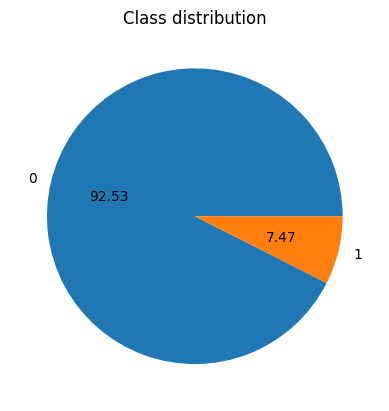

In [34]:
plot_distribution(train_set['label'])

oleh karena itu, digunakan metode SMOTE untuk melakukan oversampling untuk hasil Non-Phising

In [35]:
def balance_classes(X_t, y_t):
    sm = SMOTE(random_state=42)
    X_t_res, y_t_res = sm.fit_resample(X_t, y_t)
    return X_t_res, y_t_res

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [36]:
pipe = Pipeline([("dropper",FeatureDropper(FEATURES_TO_DROP)),
                 ("scaler", FeatureScaler()),
])

train_set = pipe.fit_transform(train_set)
val_set = pipe.transform(val_set)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [37]:
def match_columns(train, test):
    train_cols = train.columns.tolist()
    test_cols = test.columns.tolist()

    # Hapus kolom test yang tidak ada di train
    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)

    test = test[train_cols]
    return test

In [38]:
val_set = match_columns(train_set, val_set)

In [39]:
train_set.columns = train_set.columns.str.strip()

In [40]:
X_train = train_set.drop(['label'], axis=1)
y_train = train_set['label']

In [41]:
# Menerapkan fungsi untuk imbalanced dataset
X_train, y_train = balance_classes(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [42]:
X_train.head()

,URLLength,IsDomainIP,URLCharProb,HasObfuscation,LetterRatioInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,IsHighURLMatchScore
0,-0.333333,0.0,-0.007288,0.0,-0.188257,0.0,-0.071429,1,0.445783,1.014718,...,0.0,0.0,1.0,1.269231,-0.375,-0.461538,2.454545,0.89672,0.235682,1
1,1.166667,0.0,-0.301515,0.0,0.908040,0.0,-0.928571,1,1.463855,1.872330,...,1.0,0.0,0.0,1.423077,-0.250,0.692308,0.409091,0.00000,-0.181818,1
2,0.036333,0.0,-0.317594,0.0,1.819151,1.0,0.207593,1,-1.016064,-0.340293,...,0.0,0.0,0.0,-0.884615,-0.750,-1.000000,-0.784091,0.00000,-0.575758,0
3,-0.333333,0.0,0.898339,0.0,-0.188257,0.0,-0.071429,1,0.556225,0.118497,...,1.0,0.0,1.0,1.653846,-0.125,-0.307692,1.852273,1.79344,-0.060606,1
4,-1.166667,0.0,0.155848,0.0,-1.240109,0.0,0.714286,1,-0.696787,-0.322768,...,1.0,0.0,1.0,0.076923,-0.625,-0.692308,-0.409091,0.00000,-0.530303,1


In [43]:
X_train.shape

(143654, 36)

label
1.0    71827
0.0    71827
Name: count, dtype: int64


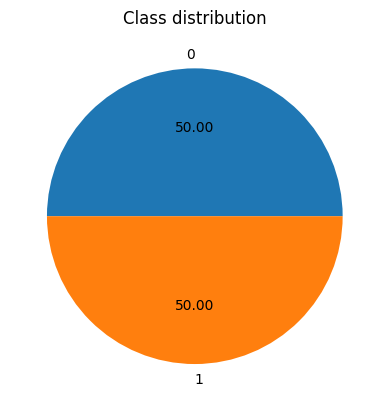

In [44]:
plot_distribution(y_train)

In [45]:
X_test = val_set.drop(['label'], axis=1)
y_test = val_set['label']

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [46]:
class KNN:
    def __init__(self, k=5, n_jobs=1, metric='minkowski', p=2, weights='uniform'):
        if k < 1 or not isinstance(k, int):
            raise ValueError("Invalid k. k must be an integer greater than 0.")
        if metric not in ['manhattan', 'euclidean', 'minkowski']:
            raise ValueError("Invalid metric. Valid metrics are 'manhattan', 'euclidean', and 'minkowski'.")
        if p < 1 or not isinstance(p, (int, float)):
            raise ValueError("Invalid p. p must be a number greater than 0.")
        if weights not in ['uniform', 'distance']:
            raise ValueError("Invalid weights. Choose 'uniform' or 'distance'.")
        if n_jobs < 1 and n_jobs != -1 or not isinstance(n_jobs, int):
            raise ValueError("Invalid n_jobs. Must be an integer greater than 0, or -1 to use all available cores.")

        self.k = k
        self.metric = metric
        self.p = p if metric == 'minkowski' else (1 if metric == 'manhattan' else 2)
        self.weights = weights
        self.n_jobs = cpu_count() if n_jobs == -1 else n_jobs

    def get_params(self, deep=True):
        return {
            "k": self.k,
            "metric": self.metric,
            "p": self.p,
            "weights": self.weights,
            "n_jobs": self.n_jobs,
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def _compute_distances(self, test):

        distances = np.linalg.norm(self.X_train - test, ord=self.p, axis=1)
        return distances

    def fit(self, X_train, y_train):

        if isinstance(X_train, pd.DataFrame):
            self.X_train = X_train.values.astype(float)
        else:
            self.X_train = np.array(X_train).astype(float)
        self.y_train = pd.Series(y_train) if not isinstance(y_train, pd.Series) else y_train

    def predict(self, X_test):
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values.astype(float)
        else:
            X_test = np.array(X_test, dtype=float)

        def predict_instance(row):
            distances = self._compute_distances(row)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train.iloc[nearest_indices]

            if self.weights == 'distance':
                nearest_distances = distances[nearest_indices]
                weights = 1 / (nearest_distances + 1e-10)  # Hindari pembagian dengan nol
                weights /= np.sum(weights)
                weighted_votes = {}
                for label, weight in zip(nearest_labels, weights):
                    if label == 0:
                        weight *= 1.5
                    weighted_votes[label] = weighted_votes.get(label, 0) + weight
                prediction = max(weighted_votes, key=weighted_votes.get)
            else:
                prediction = nearest_labels.value_counts().idxmax()  # Uniform voting
            return prediction

        start_time = time.time()
        if self.n_jobs != 1:
            with concurrent.futures.ProcessPoolExecutor(max_workers=self.n_jobs) as executor:
                predictions = list(tqdm(executor.map(predict_instance, X_test), total=len(X_test)))
        else:
            predictions = [predict_instance(row) for row in tqdm(X_test)]
        elapsed_time = time.time() - start_time
        print(f"Prediction completed in {elapsed_time:.2f} seconds.")

        return np.array(predictions)

    def save(self, path):
        with open(path, 'wb') as file:
            pickle.dump(self, file)

    @staticmethod
    def load(path):
        with open(path, 'rb') as file:
            return pickle.load(file)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
knn = KNN(k=3, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

report = classification_report(y_test, preds, output_dict=True)  # Gunakan `output_dict=True` untuk format dictionary
report_df = pd.DataFrame(report).transpose()  # Konversi ke DataFrame untuk tampilan rapi

# Menampilkan hasil dalam bentuk tabel
print("\nClassification Report as DataFrame:")
print(report_df)


100%|██████████| 19289/19289 [07:13<00:00, 44.55it/s]


Prediction completed in 433.03 seconds.

Classification Report as DataFrame:
              precision    recall  f1-score       support
0.0            0.960969  0.988235  0.974411   1445.000000
1.0            0.999045  0.996750  0.997896  17844.000000
accuracy       0.996112  0.996112  0.996112      0.996112
macro avg      0.980007  0.992492  0.986154  19289.000000
weighted avg   0.996193  0.996112  0.996137  19289.000000


In [48]:
# Calculate F1-Score (macro average)
f1_macro = f1_score(y_test, preds, average='macro')
print(f"F1 Macro Average: {f1_macro:.4f}")

F1 Macro Average: 0.9862


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
import numpy as np

# Train the KNN model
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Make predictions
preds = clf.predict(X_test)

report = classification_report(y_test, preds, output_dict=True)  # Gunakan `output_dict=True` untuk format dictionary
report_df = pd.DataFrame(report).transpose()  # Konversi ke DataFrame untuk tampilan rapi

# Menampilkan hasil dalam bentuk tabel
print("\nClassification Report as DataFrame:")
print(report_df)



Classification Report as DataFrame:
              precision    recall  f1-score       support
0.0            0.934826  0.982699  0.958165   1445.000000
1.0            0.998593  0.994452  0.996518  17844.000000
accuracy       0.993571  0.993571  0.993571      0.993571
macro avg      0.966709  0.988575  0.977341  19289.000000
weighted avg   0.993816  0.993571  0.993645  19289.000000


Berdasarkan confussion matrix tersebut, dilakukan perbedaan pembobotan model yang lebih besar pada label 0 karena pada dataset ini lebih banyak yang terdeteksi sebagai label 1 (Non-Phising) dibanding 0 (Phising). selain itu, model KNN lebih diprioritaskan untuk mendeteksi label 0

## B. Naive Bayes

In [70]:
import pickle
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.fitur = None
        self.label = None
        self.kategori = None
        self.probabilitas_prior = {}
        self.mean_fitur = {}
        self.varians_fitur = {}

    def fit(self, X, y):
        self.fitur = np.array(X)
        self.label = np.array(y)

        self.kategori = np.unique(y)

        # Menghitung probabilitas prior untuk setiap kategori
        self.probabilitas_prior = {kategori: np.sum(y == kategori) / len(y) for kategori in self.kategori}

        # Menghitung rata-rata dan variansi untuk setiap fitur di masing-masing kategori
        for kategori in self.kategori:
            indeks_kategori = np.where(y == kategori)[0]
            self.mean_fitur[kategori] = np.mean(self.fitur[indeks_kategori], axis=0)
            self.varians_fitur[kategori] = np.var(self.fitur[indeks_kategori], axis=0)

        return self

    # Fungsi Probabilitas Kepadatan Gaussian
    def gaussian(self, nilai, mean, varians):
        eps = 1e-9  # nilai kecil untuk menghindari pembagian dengan nol
        koefisien = 1.0 / np.sqrt(2.0 * np.pi * (varians + eps))
        eksponen = -((nilai - mean) ** 2) / (2.0 * (varians + eps))
        return koefisien * np.exp(eksponen)

    def predict(self, X):
        X = np.array(X)

        # Memastikan jumlah kolom pada X sesuai dengan data pelatihan
        if X.shape[1] != self.fitur.shape[1]:
            raise ValueError("Dimensi fitur pada data prediksi tidak sesuai dengan data pelatihan.")

        prediksi = []
        for sampel in X:
            probabilitas_posterior = {}
            for kategori in self.kategori:
                # Mulai dengan log probabilitas prior
                probabilitas_posterior[kategori] = np.log(self.probabilitas_prior[kategori])
                # Tambahkan log likelihood untuk setiap fitur
                for indeks_fitur in range(self.fitur.shape[1]):
                    nilai_pdf = self.gaussian(
                        sampel[indeks_fitur], self.mean_fitur[kategori][indeks_fitur], self.varians_fitur[kategori][indeks_fitur]
                    )
                    probabilitas_posterior[kategori] += np.log(nilai_pdf + 1e-9)  # Tambahkan eps untuk menghindari log(0)
            # Tambahkan kategori dengan probabilitas posterior tertinggi
            prediksi.append(max(probabilitas_posterior, key=probabilitas_posterior.get))

        return np.array(prediksi)

    def score(self, X, y):
        prediksi = self.predict(X)
        return np.mean(prediksi == np.array(y))
    
    def save(self, path):
        """Menyimpan model ke file."""
        with open(path, 'wb') as file:
            pickle.dump(self, file)

In [53]:
model2 = GaussianNaiveBayes()

In [54]:
model2.fit(X_train,y_train)

In [55]:
preds2 = model2.predict(X_test)

In [56]:
report = classification_report(y_test, preds2, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

print("\nClassification Report as DataFrame:")
report_df


Classification Report as DataFrame:


,precision,recall,f1-score,support
0.0,0.988095,0.861592,0.920518,1445.000000
1.0,0.988907,0.999159,0.994007,17844.000000
accuracy,0.988854,0.988854,0.988854,0.988854
macro avg,0.988501,0.930376,0.957262,19289.000000
weighted avg,0.988846,0.988854,0.988501,19289.000000


### Naives Bayes Library

In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [58]:
preds3 = model.predict(X_test)

In [59]:
report2 = classification_report(y_test, preds3, output_dict=True)

# Convert classification report to DataFrame
report2_df = pd.DataFrame(report2).transpose()

print("\nClassification Report as DataFrame:")
report2_df


Classification Report as DataFrame:


,precision,recall,f1-score,support
0.0,0.976318,0.884429,0.928105,1445.000000
1.0,0.990712,0.998263,0.994473,17844.000000
accuracy,0.989735,0.989735,0.989735,0.989735
macro avg,0.983515,0.941346,0.961289,19289.000000
weighted avg,0.989634,0.989735,0.989501,19289.000000


## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

### **Analisis The Model Evaluation Result**
Visualisasi untuk parameter k (jumlah neighbor) untuk model KNN.

In [61]:
knn.save('knn_model.pkl')

100%|██████████| 19289/19289 [09:08<00:00, 35.14it/s] 


Prediction completed in 548.99 seconds.


100%|██████████| 19289/19289 [07:55<00:00, 40.53it/s]


Prediction completed in 475.94 seconds.


100%|██████████| 19289/19289 [07:04<00:00, 45.39it/s]


Prediction completed in 425.00 seconds.


100%|██████████| 19289/19289 [07:55<00:00, 40.58it/s]


Prediction completed in 475.30 seconds.


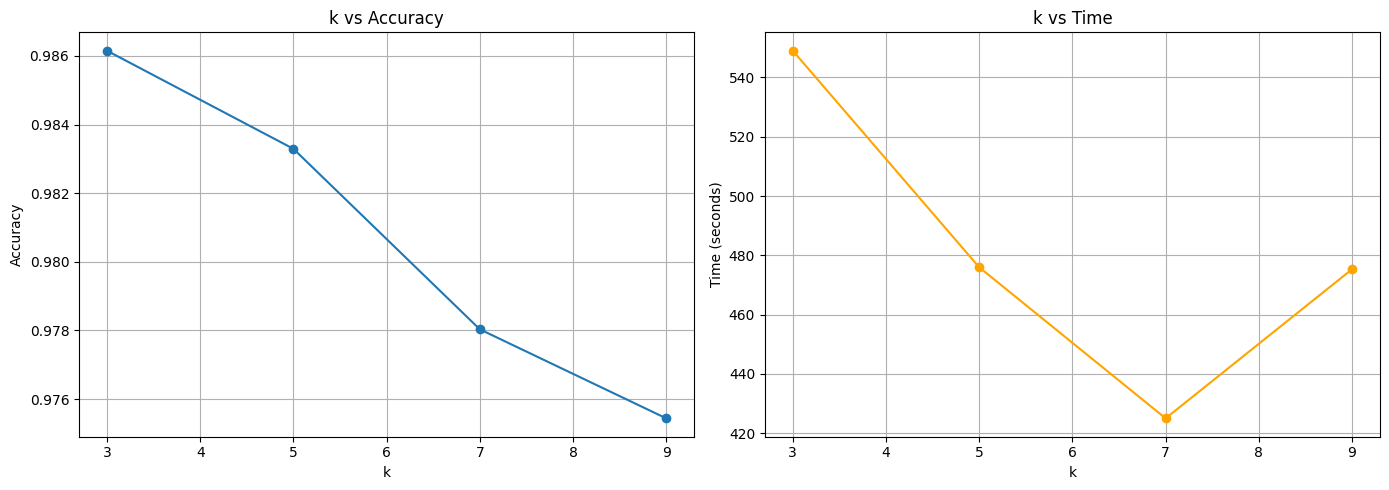

In [62]:
k_values = [3, 5, 7, 9]
accuracies = []
times = []

# Loop untuk mencoba berbagai nilai k
for k in k_values:
    clf = knn.load('knn_model.pkl')
    clf.k = k

    start = time.time()
    preds = clf.predict(X_test.values)
    stop = time.time()

    acc = f1_score(y_test, preds, average='macro')
    accuracies.append(acc)
    times.append(stop - start)

# Plot hasil
plt.figure(figsize=(14, 5))

# Plot k vs Accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o', label="Accuracy")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.grid(True)

# Plot k vs Waktu
plt.subplot(1, 2, 2)
plt.plot(k_values, times, marker='o', color='orange', label="Time (seconds)")
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Hyperparameters Tuning**
berikut adalah hyperparameter tuning dengan optuna untuk model KNN.

In [63]:
# def objective(trial):
#     k = trial.suggest_categorical("k", [3])
#     metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"])
#     weights = trial.suggest_categorical("weights", ["uniform", "distance"])
#     p = trial.suggest_int("p", 1, 2) if metric == "minkowski" else 2

#     knn = KNN(k=k, metric=metric, weights=weights, p=p)

#     # Pastikan label bertipe integer
#     y_train_int = y_train.astype(int)
#     y_test_int = y_test.astype(int)

#     knn.fit(X_train.values, y_train_int.values)
#     preds = knn.predict(X_test.values)

#     score = f1_score(y_test_int.values, preds, average='macro')
#     return -score


# # Create the Optuna study
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=50)

# # Display the best parameters and F1-score
# print("Best trial:")
# print(f"Params: {study.best_params}")
# print(f"Best F1-Score (Macro Average): {-study.best_value:.4f}")

## **Menguji data _Testing_**

In [64]:
from sklearn.pipeline import Pipeline

pipeline_clean = Pipeline([ ("length", HandleLength(False)),
                      ("https", HandleIsHTTPS(False)),
                      ("title", HandleHasTitle()),
                      ("char", HandleCharContinuationRate()),
                      ("urltitle", HandleURLTitleMatchScore()),
                      ("imputer", FeatureImputer()),
                      ("dropper1", FeatureDropper(DROP_OBJECTS)),
                      ("dropper2", FeatureDropper(FEATURES_TO_DROP)),
                      #("pca", PCATransformer()),
                 ("scaler", FeatureScaler()),
                     ])

In [65]:
X_train = train_set_ori.drop(columns=['label'])
y_train = train_set_ori['label']
X_test = test

X_train = pipeline_clean.fit_transform(X_train)
X_test = pipeline_clean.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/var/folders/1d/rdx68y05429_hh254m9f84h40000gn/T/ipykernel_99944/3648908469.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(self.bool_mode_imputer[col], inplace=True)
/var/folders/1d/rdx68y05429_hh254m9f84h40000gn/T/ipykernel_99944/3648908469.py:26: FutureWarning: A value is trying to be set on a copy of

In [66]:
knn = KNN(k=3, metric='manhattan', weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

100%|██████████| 10000/10000 [03:59<00:00, 41.69it/s]

Prediction completed in 239.89 seconds.


In [67]:
X_test.shape

(10000, 35)

In [68]:
len(y_pred)

10000

In [69]:
submission = pd.DataFrame({'id': test['id'], 'label': y_pred})


submission.to_csv('submission_2.csv', index=False)

submission.head()

,id,label
0,48.0,1
1,68.0,0
2,76.0,1
3,155.0,1
4,167.0,0


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`